<a href="https://colab.research.google.com/github/Aaliya02/Deep-learning/blob/main/Regression_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression with keras


In [2]:
import  pandas as pd
url='https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/PowerPlant.csv'
df=pd.read_csv(url)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [4]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [5]:
df.duplicated().sum()

41

In [6]:
df.duplicated().sum()/len(df)

0.004285117056856187

In [8]:
x=df.drop(columns=['PE'])
y=df[['PE']]

In [9]:
x.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [10]:
y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


In [11]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [12]:
num_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),
                         ('scaler',StandardScaler())]).set_output(transform='pandas')

In [13]:
x_pre=num_pipe.fit_transform(x)
x_pre.head()

,AT,V,AP,RH
0,-1.517862,-1.065205,-0.407357,1.143944
1,0.535255,0.329277,-0.313057,0.061031
2,1.353818,0.204151,-1.028729,-2.150688
3,-0.077996,-0.363242,-1.016941,0.238434
4,-1.053562,-1.073861,0.651838,1.636427


In [16]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_pre,y,test_size=0.2,random_state=42)

In [17]:
xtrain.head()

,AT,V,AP,RH
5487,0.749961,0.721180,-0.329896,-0.486248
3522,0.864023,1.266539,-0.984946,0.826125
6916,0.936486,1.524659,0.318419,0.809686
7544,1.665141,1.380647,-0.902434,-1.155449
7600,1.214260,1.364121,-1.035464,-0.236924


In [18]:
ytrain.head()

,PE
5487,442.75
3522,432.52
6916,428.80
7544,426.07
7600,436.58


In [19]:
xtest.head()

,AT,V,AP,RH
2513,1.348451,0.239564,-1.284687,-1.093118
9411,0.813030,1.364121,-0.742460,0.274052
8745,-0.244392,-0.738619,1.983830,-0.186923
9085,-1.367568,-1.015627,2.276835,0.977500
4950,1.375289,0.825058,0.613107,-1.717111


In [20]:
ytest.head()

,PE
2513,433.27
9411,438.16
8745,458.42
9085,480.82
4950,441.41


In [21]:
xtrain.shape

(7654, 4)

In [25]:
from keras.models import Sequential
from keras.layers import Dense,Input

In [31]:
model = Sequential()
model.add(Input(shape=(xtrain.shape[1],)))
model.add(Dense(units=8,activation='relu'))
model.add(Dense(units=4,activation='relu'))
model.add(Dense(units=1,activation='linear'))

In [32]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 40        
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 81 (324.00 Byte)
Trainable params: 81 (324.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
model.compile(loss='mse',optimizer='adam',metrics=['mae'])
hist=model.fit(xtrain,ytrain,validation_split=0.2,epochs=100)

Epoch 1/100
192/192 [==============================] - 3s 5ms/step - loss: 205591.9375 - mae: 453.0812 - val_loss: 202853.6719 - val_mae: 450.0457
Epoch 2/100
192/192 [==============================] - 1s 5ms/step - loss: 198409.4531 - mae: 445.0805 - val_loss: 190225.9688 - val_mae: 435.8426
Epoch 3/100
192/192 [==============================] - 1s 5ms/step - loss: 177082.5469 - mae: 420.3441 - val_loss: 159626.5000 - val_mae: 399.0344
Epoch 4/100
192/192 [==============================] - 1s 6ms/step - loss: 137496.4844 - mae: 368.9136 - val_loss: 114112.7109 - val_mae: 334.4470
Epoch 5/100
192/192 [==============================] - 1s 5ms/step - loss: 90878.0156 - mae: 293.1595 - val_loss: 70893.5078 - val_mae: 251.7843
Epoch 6/100
192/192 [==============================] - 1s 4ms/step - loss: 54694.6797 - mae: 212.7336 - val_loss: 43734.3789 - val_mae: 184.3753
Epoch 7/100
192/192 [==============================] - 1s 4ms/step - loss: 34949.0039 - mae: 161.5805 - val_loss: 30179.95

In [34]:
model.evaluate(xtrain,ytrain)

240/240 [==============================] - 1s 4ms/step - loss: 20.5937 - mae: 3.5783


[20.59369468688965, 3.5782928466796875]

In [36]:
model.evaluate(xtest,ytest)

60/60 [==============================] - 0s 2ms/step - loss: 19.3341 - mae: 3.4777


[19.334131240844727, 3.477749824523926]

In [37]:
hist.history['loss']

[205591.9375,
 198409.453125,
 177082.546875,
 137496.484375,
 90878.015625,
 54694.6796875,
 34949.00390625,
 25123.044921875,
 19665.73828125,
 16094.0390625,
 13188.7236328125,
 10498.64453125,
 8040.99560546875,
 5963.72021484375,
 4321.28125,
 3103.579833984375,
 2258.893310546875,
 1680.692138671875,
 1281.4820556640625,
 999.42333984375,
 794.5087280273438,
 636.017333984375,
 512.2652587890625,
 410.48480224609375,
 327.8702087402344,
 260.36749267578125,
 205.53160095214844,
 161.9159393310547,
 126.65421295166016,
 100.31781005859375,
 80.61730194091797,
 66.19558715820312,
 55.539493560791016,
 47.71339797973633,
 42.038902282714844,
 37.71105194091797,
 34.471702575683594,
 31.731473922729492,
 29.532026290893555,
 27.70110321044922,
 26.21603775024414,
 25.20512580871582,
 24.147857666015625,
 23.549745559692383,
 23.07088279724121,
 22.695068359375,
 22.472579956054688,
 22.393844604492188,
 22.14571762084961,
 22.057174682617188,
 22.08138656616211,
 21.886003494262695,


In [38]:
hist.history['val_mae']

[450.04571533203125,
 435.84259033203125,
 399.03436279296875,
 334.447021484375,
 251.78427124023438,
 184.37530517578125,
 148.51687622070312,
 128.3086395263672,
 115.10711669921875,
 104.09859466552734,
 93.0523681640625,
 81.56336975097656,
 70.1120834350586,
 59.49917221069336,
 49.97285461425781,
 41.933292388916016,
 35.50172805786133,
 30.430395126342773,
 26.445344924926758,
 23.17550277709961,
 20.545597076416016,
 18.084985733032227,
 16.142833709716797,
 14.296296119689941,
 12.395297050476074,
 11.062583923339844,
 9.43775463104248,
 8.518599510192871,
 7.5316901206970215,
 6.584164142608643,
 5.986343860626221,
 5.497499465942383,
 5.1066975593566895,
 4.699838161468506,
 4.440762519836426,
 4.293874740600586,
 4.115168571472168,
 3.9772861003875732,
 3.9073798656463623,
 3.7909224033355713,
 3.7053747177124023,
 3.667066812515259,
 3.609166383743286,
 3.5895771980285645,
 3.59393048286438,
 3.5493364334106445,
 3.5256259441375732,
 3.514474868774414,
 3.525698661804199,

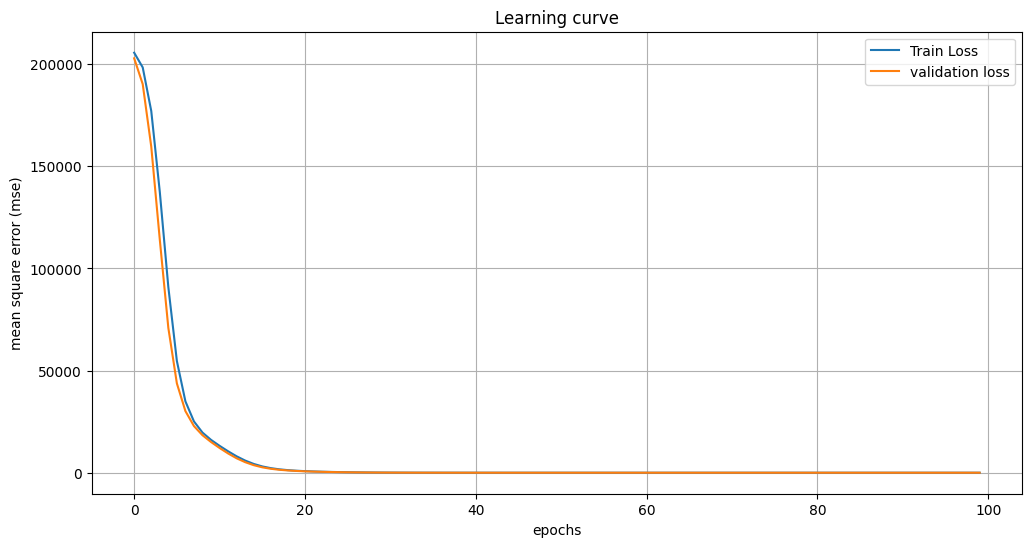

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.xlabel('epochs')
plt.ylabel('mean square error (mse)')
plt.title('Learning curve')
plt.legend()
plt.grid()
plt.show()

In [42]:


ypred_train = model.predict(xtrain)
ypred_test = model.predict(xtest)

60/60 [==============================] - 1s 8ms/step


In [43]:


ypred_train[0:5]


array([[443.52985],
       [435.27664],
       [433.3136 ],
       [429.64246],
       [433.33054]], dtype=float32)

In [44]:


ytrain.head()

,PE
5487,442.75
3522,432.52
6916,428.80
7544,426.07
7600,436.58


In [45]:


ypred_test[0:5]

array([[436.17108],
       [437.6292 ],
       [461.84772],
       [476.70728],
       [436.15463]], dtype=float32)

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [47]:

def evaluate_model(model, x, y):
  ypred = model.predict(x)
  mse = mean_squared_error(y, ypred)
  rmse = mse**(1/2)
  mae = mean_absolute_error(y, ypred)
  r2 = r2_score(y, ypred)
  print(f'Mean Squared Error : {mse:.2f}')
  print(f'Root Mean Squared Error : {rmse:.2f}')
  print(f'Mean Absolute Error : {mae:.2f}')
  print(f'R2 Score : {r2:.4f}')


In [48]:
evaluate_model(model, xtrain, ytrain)

240/240 [==============================] - 1s 4ms/step
Mean Squared Error : 20.59
Root Mean Squared Error : 4.54
Mean Absolute Error : 3.58
R2 Score : 0.9296


In [49]:

model.save('PowerOutput.keras')


In [50]:
from keras.models import load_model


In [51]:
m = load_model('/content/PowerOutput.keras')
